<a href="https://colab.research.google.com/github/aslanidze/Machine_Learning/blob/main/SecondLogisticRegression_wdbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Uploaded = files.upload ()

Saving wdbc.csv to wdbc.csv


In [ ]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('wdbc.csv')

# نمایش ۵ سطر اول دادهها
print(df.head())

# بررسی اطلاعات کلی (تعداد سطرها، ستونها، نوع دادهها)
print(df.info())

# آمار توصیفی دادهها
print(df.describe())

         ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_worst  Texture_worst  Perimeter_worst  Area_wor

In [ ]:
# بررسی دادههای گمشده
print(df.isnull().sum())

# حذف ستون ID (غیرضروری برای مدلسازی)
df = df.drop(columns=['ID'])

ID                         0
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64


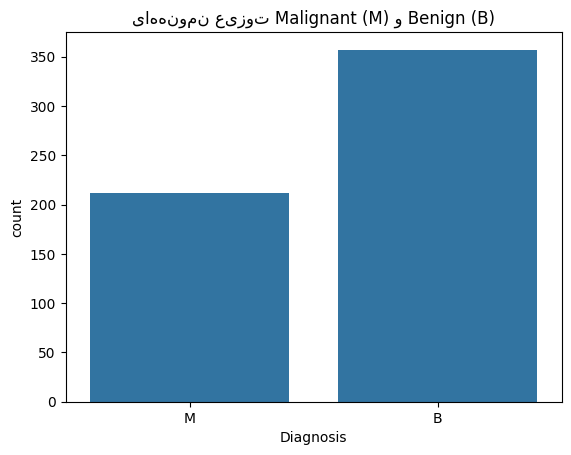

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# توزیع کلاس Diagnosis
tex = 'توزیع نمونه‌های'
sns.countplot(x='Diagnosis', data=df)
plt.title(f'{tex[::-1]} Malignant (M) و Benign (B)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# جداسازی ویژگیها و برچسب
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# استانداردسازی ویژگیها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

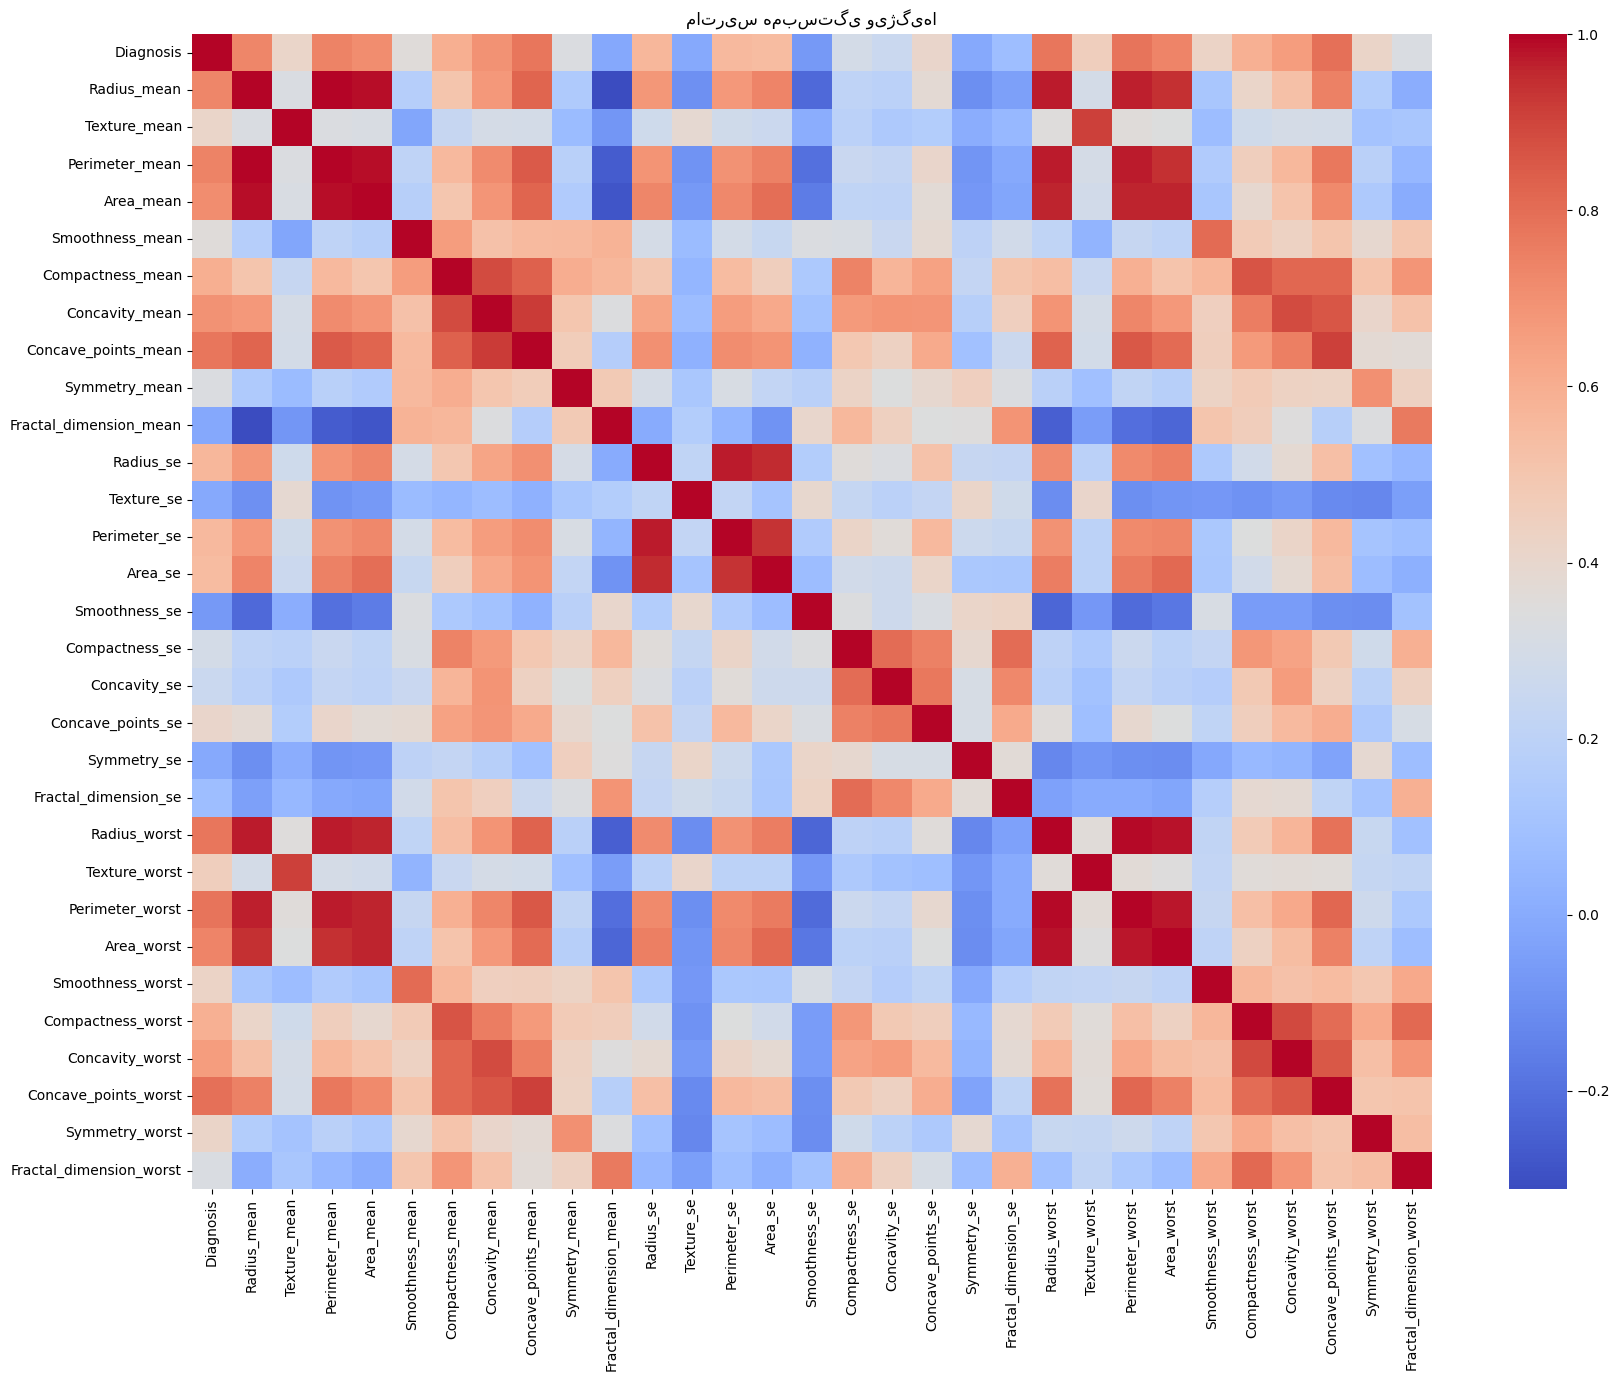

In [ ]:
# ماتریس همبستگی
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('ماتریس همبستگی ویژگیها')
plt.show()

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# آموزش مدل
model = LogisticRegression()
model.fit(X_train, y_train)

# پیشبینی روی داده آزمون
y_pred = model.predict(X_test)

# ارزیابی مدل
print('دقت مدل:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

دقت مدل: 0.9736842105263158
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.model_selection import GridSearchCV

# تنظیم هایپرپارامترها
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), params, cv=5)
grid.fit(X_train, y_train)

# بهترین مدل
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print('دقت بهبودیافته:', accuracy_score(y_test, y_pred))

دقت بهبودیافته: 0.9912280701754386
